# Steel Shop Data Evaluation / EDA

A notebook to conduct an initial exploratory analysis of the steel shop data.

## Load data and process

In [3]:
# some imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
# load into a pandas dataframe
df = pd.read_csv('../data/output.csv')

# print the first 5 rows of the dataframe
print(df.head())

# print the last 5 rows of the dataframe
print(df.tail())

   heatid             datetime  end_t   gas1
0   16523  2023-01-01 01:00:00    NaN  9.847
1   16523  2023-01-01 01:00:05    NaN  9.850
2   16523  2023-01-01 01:00:10    NaN  9.852
3   16523  2023-01-01 01:00:15    NaN  9.856
4   16523  2023-01-01 01:00:20    NaN  9.863
        heatid             datetime   end_t    gas1
108982   17212  2023-01-30 23:13:40     NaN  10.686
108983   17212  2023-01-30 23:13:45     NaN  10.689
108984   17212  2023-01-30 23:13:50     NaN  10.690
108985   17212  2023-01-30 23:13:55     NaN  10.691
108986   17212  2023-01-30 23:13:55  1653.0  10.691


In [5]:
# parse the datetime column into a datetime object
# we don't set it as the index, since the data will be processed in heats
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

heatid               int64
datetime    datetime64[ns]
end_t              float64
gas1               float64
dtype: object

In [9]:
# since this a transient, batch process, let's add another feature
# the time since the start of the current heat
df['time_since_heat_start'] = df.groupby('heatid')['datetime'].transform(lambda x: x-x.min())

## Some initial plots

Let's start by looking at the temperature of the furnace over time.

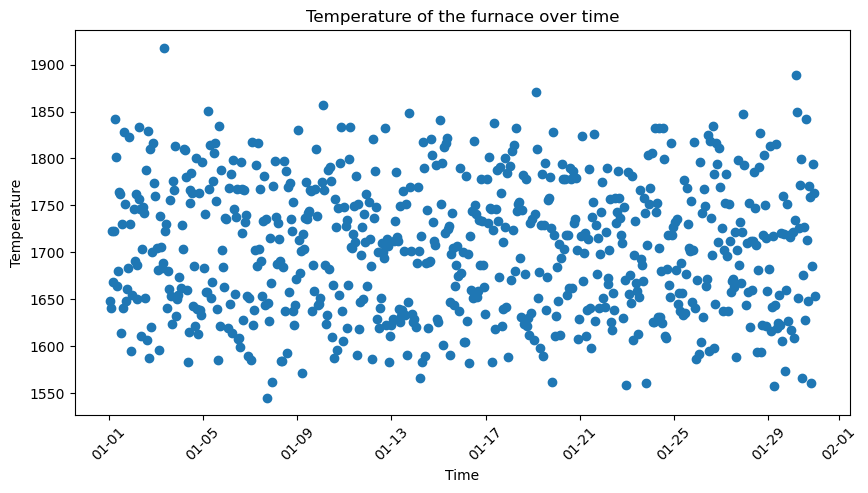

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['datetime'], df['end_t'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature of the furnace over time')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)
plt.show()


There's no markedly different change in the end-temperatures over time. Assuming the process was operated according to the same stoppage procedure or model, this makes sense considering the batch nature of the process.

Next, let's look at the shape of the distribution of the end temperatures.

## Analysing the data by oxygen blow heats

Let's rather group the data by individual heats and look for some characteristics

In [ ]:
# let's visualise the end_temper

# group by heat
df_grouped = df.groupby('heatid')

# print the first 5 rows of the grouped dataframe
print(df_grouped.head())



        heatid            datetime  end_t   gas1
0        16523 2023-01-01 01:00:00    NaN  9.847
1        16523 2023-01-01 01:00:05    NaN  9.850
2        16523 2023-01-01 01:00:10    NaN  9.852
3        16523 2023-01-01 01:00:15    NaN  9.856
4        16523 2023-01-01 01:00:20    NaN  9.863
...        ...                 ...    ...    ...
108838   17212 2023-01-30 23:00:00    NaN  9.849
108839   17212 2023-01-30 23:00:05    NaN  9.860
108840   17212 2023-01-30 23:00:10    NaN  9.866
108841   17212 2023-01-30 23:00:15    NaN  9.873
108842   17212 2023-01-30 23:00:20    NaN  9.878

[3450 rows x 4 columns]
